In [110]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.feature_selection import mutual_info_regression
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge



In [111]:
df = pd.read_csv('LifeExpectancyClean.csv', index_col=0)

In [112]:
cols = ['Alcohol', 'Percentage Expenditure',
       'Diphtheria', 'HIV/AIDS', 'Population', 'PopulationDensity',
       'Income Composition of Resources', 'HighIncome', 
       'HealthyWeightBMI', 'Thinness 1-19 Years',
       'Human Rights', 'Suicide Rate', 'Agriculture Employment', 'Schooling']

cols_ext = ['Life Expectancy',
       'Alcohol', 'Percentage Expenditure',
       'Diphtheria', 'HIV/AIDS', 'Population', 'PopulationDensity',
       'Income Composition of Resources', 'HighIncome', 
       'HealthyWeightBMI', 'Thinness 1-19 Years',
       'Human Rights', 'Suicide Rate', 'Agriculture Employment', 'Schooling']

## Multiple Linear Regression Model

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.36694e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


MAE: 3.0964187305404334
MSE: 18.78198586916609
RMSE: 4.3338188551398975
R^2: 0.7845786687953987
Intercept: 54.75872247596914
Coefficients: [ 0.00000000e+00  5.72573631e-02  2.41250577e-04  5.56206174e-02
 -6.46176445e-01  4.91706255e-09  1.43399751e-03  6.23214825e+00
  1.72221989e+00 -4.62640524e+00 -5.27076460e-02  2.39212701e+00
 -1.55839610e-01  9.81906739e-06  6.52065996e-01]
                            OLS Regression Results                            
Dep. Variable:        Life Expectancy   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     691.7
Date:                Sat, 07 Dec 2024   Prob (F-statistic):               0.00
Time:                        09:18:57   Log-Likelihood:                -6634.4
No. Observations:                2329   AIC:                         1.330e+04
Df Residuals:                    2314   BIC:                   

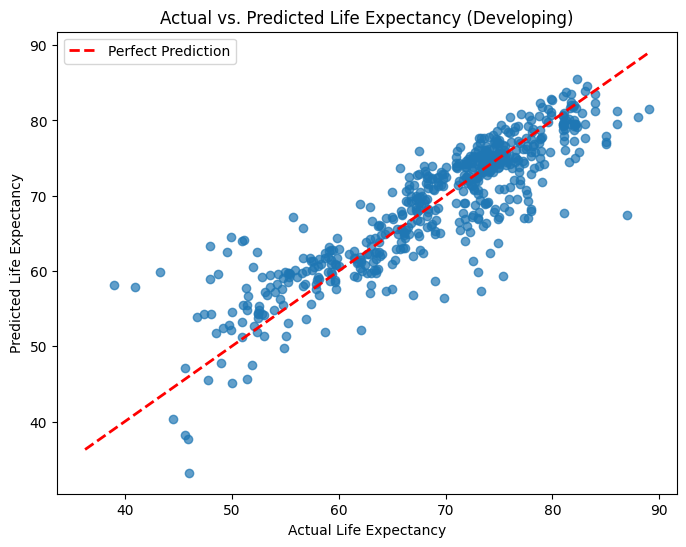

In [113]:
def run_regression(X, y):
    """ Fits a Ridge regression model, evaluates its performance, displays key metrics and OLS summary 
    statistics, and creates a scatter plot of predicted vs. actual values.

    Parameters
        X : Array of independent variables.
        y : Array of the dependent variable. 

    Returns
        None
        Prints model performance metrics and OLS summary.
    """

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit Ridge regression model
    ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength)
    ridge_model.fit(X_train, y_train)

    # Predictions
    y_pred = ridge_model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {np.sqrt(mse)}')
    print(f'R^2: {r2}')

    # Coefficients and intercept
    print("Intercept:", ridge_model.intercept_)
    print("Coefficients:", ridge_model.coef_)

    # Approximate p-values using statsmodels OLS
    ols_model = sm.OLS(y_train, X_train).fit()
    print(ols_model.summary())  # Will show coefficients, p-values, and more
    
    # Scatter plot of actual vs. predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')  # Diagonal line
    plt.xlabel('Actual Life Expectancy')
    plt.ylabel('Predicted Life Expectancy')
    plt.title('Actual vs. Predicted Life Expectancy (Developing)')
    plt.legend()
    plt.show()
    
# Prepare the data
X = df[cols]  # Independent variables
y = df['Life Expectancy']  # Dependent variable

# Add constant to the independent variables (intercept term)
X = sm.add_constant(X, has_constant='add')

run_regression(X, y)


## Test Multicollinearity and Correlation

### VIF

In [114]:
def calculate_vif(X):
    """ Calculates the Variance Inflation Factor (VIF) for each feature in the dataset 
    to detect multicollinearity among independent variables.
    
    Parameters
        X : X : Array of independent variables.

    Returns
        None
        Prints a DataFrame showing each feature's VIF value.
    """ 
    # Calculate VIF for each independent variable
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    print(vif_data)
    
calculate_vif(X)


                           Variable        VIF
0                             const  51.196564
1                           Alcohol   1.844181
2            Percentage Expenditure   1.913104
3                        Diphtheria   1.249555
4                          HIV/AIDS   1.140817
5                        Population   1.115840
6                 PopulationDensity   1.091857
7   Income Composition of Resources   2.945481
8                        HighIncome   1.990981
9                  HealthyWeightBMI   2.169441
10              Thinness 1-19 Years   1.842080
11                     Human Rights   1.507197
12                     Suicide Rate   1.149675
13           Agriculture Employment   1.289710
14                        Schooling   3.709718


### PCA

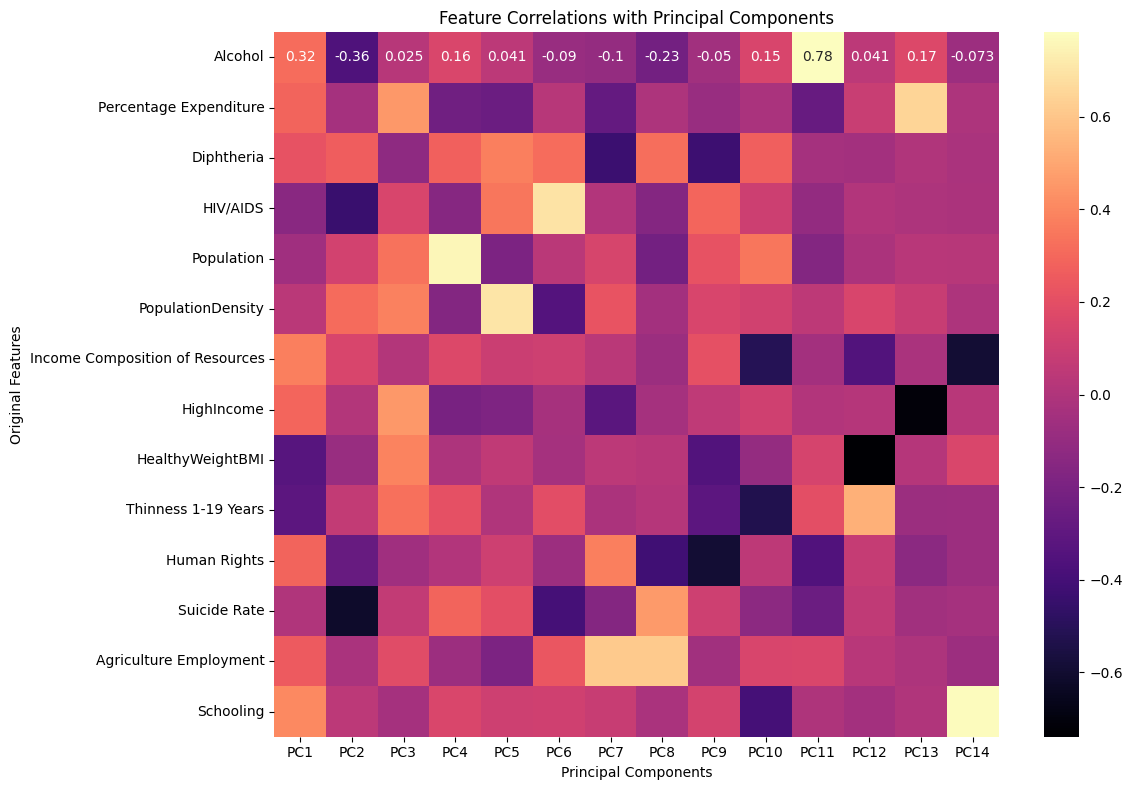

PC1 explains 32.24% of the variance.
PC2 explains 9.88% of the variance.
PC3 explains 9.60% of the variance.
PC4 explains 7.82% of the variance.
PC5 explains 6.81% of the variance.
PC6 explains 5.73% of the variance.
PC7 explains 5.60% of the variance.
PC8 explains 5.10% of the variance.
PC9 explains 4.28% of the variance.
PC10 explains 3.87% of the variance.
PC11 explains 3.03% of the variance.
PC12 explains 2.42% of the variance.
PC13 explains 2.31% of the variance.
PC14 explains 1.31% of the variance.


In [115]:
def calculate_pca():
    """ Performs Principal Component Analysis (PCA) on a set of features, visualizes feature correlations 
    with principal components, and prints the explained variance ratio for each component.

    Returns
        None
        Displays a heatmap of feature-PC correlations and prints the explained variance for each principal component.
    """
    X_PCA = df[cols]

    # Standardize the data 
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_PCA)

    # Perform PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    # Get the loadings 
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=[f"PC{i+1}" for i in range(X_pca.shape[1])],
        index=cols
    )

    # Calculate the explained variance ratio for each PC
    explained_variance = pca.explained_variance_ratio_

    # Plot the correlation matrix 
    plt.figure(figsize=(12, 8))
    sns.heatmap(loadings, annot=True, cmap="magma", cbar=True)
    plt.title("Feature Correlations with Principal Components")
    plt.xlabel("Principal Components")
    plt.ylabel("Original Features")
    plt.tight_layout()
    plt.show()

    # Print explained variance ratios
    for i, var in enumerate(explained_variance, 1):
        print(f"PC{i} explains {var:.2%} of the variance.")
        
calculate_pca()

### Correlation Matrix

,Life Expectancy,Alcohol,Percentage Expenditure,Diphtheria,HIV/AIDS,Population,PopulationDensity,Income Composition of Resources,HighIncome,HealthyWeightBMI,Thinness 1-19 Years,Human Rights,Suicide Rate,Agriculture Employment,Schooling
Life Expectancy,1.000000,0.395725,0.392934,0.475946,-0.557549,0.020565,0.149266,0.690556,0.434693,-0.652810,-0.476540,0.386159,-0.202044,0.361730,0.717411
Alcohol,0.395725,1.000000,0.361232,0.216445,-0.048388,-0.024145,-0.047873,0.436589,0.389737,-0.389612,-0.418761,0.490051,0.234531,0.255563,0.526792
Percentage Expenditure,0.392934,0.361232,1.000000,0.147172,-0.106867,-0.046857,0.085970,0.396631,0.662795,-0.225579,-0.256458,0.281511,-0.008645,0.342071,0.404720
Diphtheria,0.475946,0.216445,0.147172,1.000000,-0.163320,-0.001994,0.090311,0.385312,0.177888,-0.342823,-0.228225,0.155829,-0.063578,0.143904,0.403761
HIV/AIDS,-0.557549,-0.048388,-0.106867,-0.163320,1.000000,-0.049091,-0.036280,-0.243547,-0.131954,0.265151,0.203049,-0.067349,0.154562,-0.105054,-0.217515
Population,0.020565,-0.024145,-0.046857,-0.001994,-0.049091,1.000000,0.010537,0.004602,-0.022556,0.156823,0.256959,-0.099423,0.028308,-0.022472,-0.043594
PopulationDensity,0.149266,-0.047873,0.085970,0.090311,-0.036280,0.010537,1.000000,0.116355,0.151868,0.086809,0.012518,0.008503,-0.085217,0.044090,0.077314
Income Composition of Resources,0.690556,0.436589,0.396631,0.385312,-0.243547,0.004602,0.116355,1.000000,0.420532,-0.530452,-0.417869,0.384823,-0.067843,0.350697,0.794733
HighIncome,0.434693,0.389737,0.662795,0.177888,-0.131954,-0.022556,0.151868,0.420532,1.000000,-0.253860,-0.288875,0.250808,-0.026974,0.324883,0.416156
HealthyWeightBMI,-0.652810,-0.389612,-0.225579,-0.342823,0.265151,0.156823,0.086809,-0.530452,-0.253860,1.000000,0.599522,-0.338723,0.089308,-0.264214,-0.604196


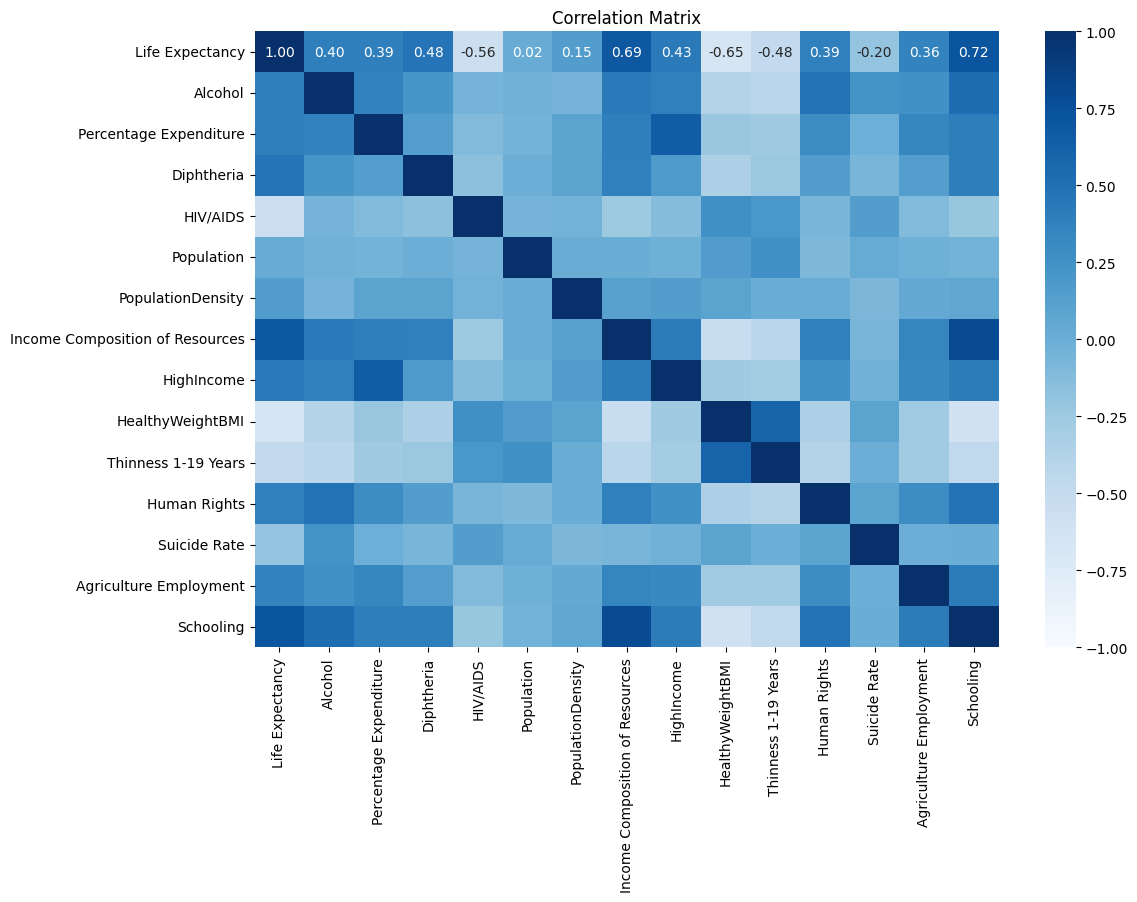

In [116]:
def calculate_corr_matrix():
    """Computes and visualizes the correlation matrix for a set of features.

    Returns
        None
        Displays the correlation matrix and the heatmap visualization.
    """
    df_corr = df[cols_ext]

    # Compute the correlation matrix
    corr_matrix = df_corr.corr()

    # Display the correlation matrix
    display(corr_matrix)

    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1, fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()

calculate_corr_matrix()

## Feature Importance - Random Forest


Feature Importance:
                            Feature  Importance
4                          HIV/AIDS    0.621240
7   Income Composition of Resources    0.207218
14                        Schooling    0.028121
12                     Suicide Rate    0.021478
6                 PopulationDensity    0.018636
9                  HealthyWeightBMI    0.015419
10              Thinness 1-19 Years    0.015194
5                        Population    0.014662
3                        Diphtheria    0.013151
11                     Human Rights    0.012484
1                           Alcohol    0.011116
13           Agriculture Employment    0.009426
2            Percentage Expenditure    0.006127
8                        HighIncome    0.005728
0                             const    0.000000


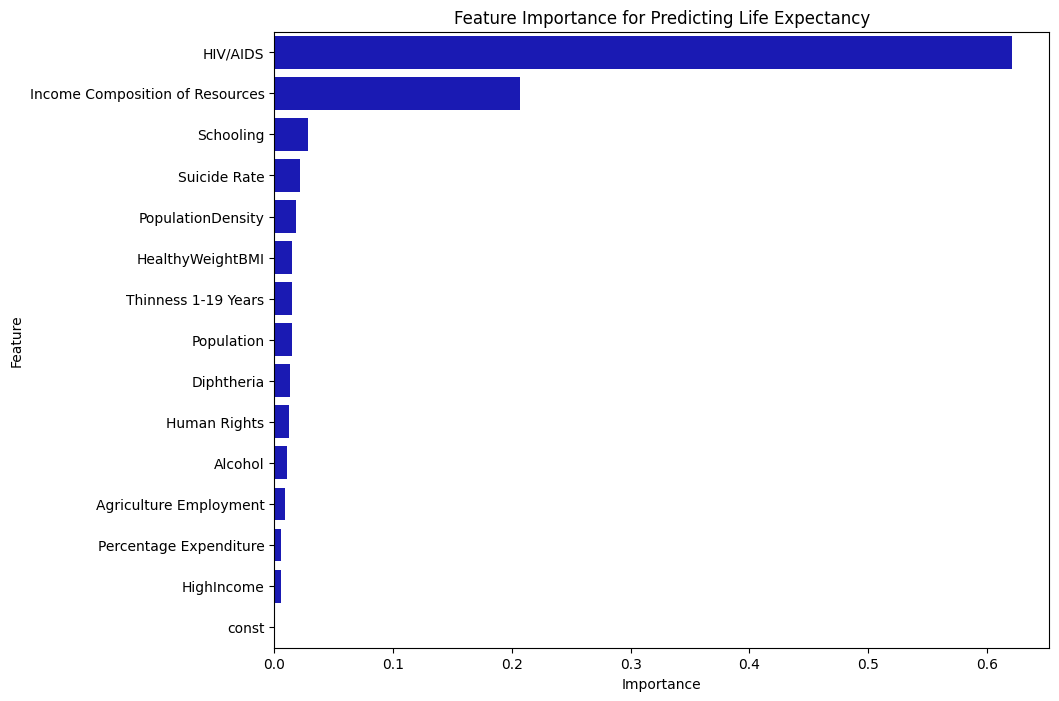

In [117]:
def random_forest(X, y):
    """ Trains a Random Forest Regressor, evaluates feature importance, 
    and visualizes the most important features.

    Parameters
        X : Array of independent variables.
        y : Array of the dependent variable. 

    Returns
        None
        Prints the feature importance table and displays the bar plot of feature importance.
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Random Forest Regressor
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Predict on the test data
    y_pred = rf.predict(X_test)

    # Feature Importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print("\nFeature Importance:")
    print(feature_importance)

    # Visualize Feature Importance
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', color='mediumblue', data=feature_importance)
    plt.title('Feature Importance for Predicting Life Expectancy')
    plt.show()
    
random_forest(X, y)
